In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import tqdm
from torchsummary import summary
from torchvision import models

from pathlib import Path
import os

In [8]:
    # Define data directory
data_dir = Path(os.getcwd()) / 'my_data'
training_dir = data_dir / 'training'
x_dir = training_dir / 'x'
y_dir = training_dir / 'y'

    # Read data
indexes = range(0,99) #range(0,6999)
indexes_leading_zero = [str(index).zfill(5) for index in indexes]
files_names = [index + '.bin' for index in indexes_leading_zero]
x = np.array([np.fromfile(x_dir / file, 'uint8') for file in files_names])
y = np.array([np.fromfile(y_dir / file, 'uint8') for file in files_names])

train_data = torch.from_numpy(x)
train_data = train_data.unsqueeze(1)
train_data = train_data.to(torch.float)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False)

test_data = torch.from_numpy(y)
test_data = test_data.unsqueeze(1)
test_data = test_data.to(torch.float)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

In [10]:
print(type(test_data))
print(test_data)
test_data.size()

<class 'torch.Tensor'>
tensor([[[1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 0.,  ..., 0., 0., 1.]],

        [[0., 0., 1.,  ..., 0., 1., 0.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 1.]],

        [[0., 0., 0.,  ..., 1., 0., 1.]]])


torch.Size([99, 1, 1792])

In [16]:
# Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.conv1 = nn.Conv1d(1, 8, kernel_size=5, padding=0, stride=1)
        self.conv2 = nn.Conv1d(8, 16, kernel_size=5, padding=0, stride=1)
        self.conv3 = nn.Conv1d(16, 32, kernel_size=4, padding=0, stride=1)

        self.pool = nn.AvgPool1d(2)

        self.bn1 = nn.BatchNorm1d(8)
        self.bn2 = nn.BatchNorm1d(16)
        self.bn3 = nn.BatchNorm1d(32)

        self.t_conv1 = nn.ConvTranspose1d(32, 16, 5, padding=0, stride=2)
        self.t_conv2 = nn.ConvTranspose1d(16, 8, 6, padding=0, stride=2)
        self.t_conv3 = nn.ConvTranspose1d(8, 1, 6, padding=0, stride=2)

        self.t_bn1 = nn.BatchNorm1d(16)
        self.t_bn2 = nn.BatchNorm1d(8)
        self.t_bn3 = nn.BatchNorm1d(1)

    def forward(self, out):
        # Encoder
        out = self.conv1(out)
        out = F.relu(out)
        out = self.pool(out)
        out = self.bn1(out)

        out = self.conv2(out)
        out = F.relu(out)
        out = self.pool(out)
        out = self.bn2(out)

        out = self.conv3(out)
        out = F.relu(out)
        out = self.pool(out)
        out = self.bn3(out)

        # Decoder
        out = self.t_conv1(out)
        out = F.relu(out)
        out = self.t_bn1(out)

        out = self.t_conv2(out)
        out = F.relu(out)
        out = self.t_bn2(out)

        out = self.t_conv3(out)
        out = F.relu(out)
        out = self.t_bn3(out)

        return out

In [17]:
#Print model summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvAutoencoder().to(device)

summary(model, (1, 1792))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 8, 1788]              48
         AvgPool1d-2               [-1, 8, 894]               0
       BatchNorm1d-3               [-1, 8, 894]              16
            Conv1d-4              [-1, 16, 890]             656
         AvgPool1d-5              [-1, 16, 445]               0
       BatchNorm1d-6              [-1, 16, 445]              32
            Conv1d-7              [-1, 32, 442]           2,080
         AvgPool1d-8              [-1, 32, 221]               0
       BatchNorm1d-9              [-1, 32, 221]              64
  ConvTranspose1d-10              [-1, 16, 445]           2,576
      BatchNorm1d-11              [-1, 16, 445]              32
  ConvTranspose1d-12               [-1, 8, 894]             776
      BatchNorm1d-13               [-1, 8, 894]              16
  ConvTranspose1d-14              [-1, 

cpu
Epoch: 1 	Training Loss: 0.252230
Epoch: 2 	Training Loss: 0.250814
Epoch: 3 	Training Loss: 0.250854
Epoch: 4 	Training Loss: 0.250862
Epoch: 5 	Training Loss: 0.250866
Epoch: 6 	Training Loss: 0.250868
Epoch: 7 	Training Loss: 0.250869
Epoch: 8 	Training Loss: 0.250869
Epoch: 9 	Training Loss: 0.250870
Epoch: 10 	Training Loss: 0.250870
Epoch: 11 	Training Loss: 0.250870
Epoch: 12 	Training Loss: 0.250870
Epoch: 13 	Training Loss: 0.250870
Epoch: 14 	Training Loss: 0.250870
Epoch: 15 	Training Loss: 0.250871
Epoch: 16 	Training Loss: 0.250871
Epoch: 17 	Training Loss: 0.250871
Epoch: 18 	Training Loss: 0.250871
Epoch: 19 	Training Loss: 0.250871
Epoch: 20 	Training Loss: 0.250871
Epoch: 21 	Training Loss: 0.250871
Epoch: 22 	Training Loss: 0.250871
Epoch: 23 	Training Loss: 0.250871
Epoch: 24 	Training Loss: 0.250871
Epoch: 25 	Training Loss: 0.250871
Epoch: 26 	Training Loss: 0.250871
Epoch: 27 	Training Loss: 0.250871
Epoch: 28 	Training Loss: 0.250871
Epoch: 29 	Training Loss:

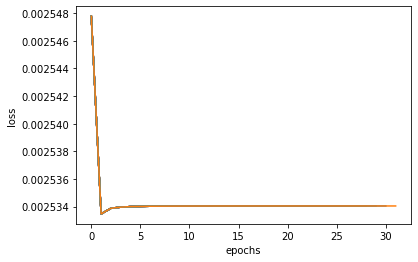

In [45]:
#Loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.1)

##--------------------------------------------------------------------------

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

##--------------------------------------------------------------------------

#Epochs
n_epochs = 32

loss_history = []
for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    #Training
    for data in train_loader:
        target = data
        target = target.to(device)
        optimizer.zero_grad()
        outputs = model(target)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*target.size(0)

    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

    #Plot history
    loss_history.append(train_loss / len(train_data))
    plt.plot(loss_history)
    plt.xlabel('epochs')
    plt.ylabel('loss')